In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
apteka_list =  [
                #{'name':'vita', 'prefix':2000000},
                {'name':'rigla', 'prefix':1000000},
                {'name':'apteka36','prefix':3000000},
                {'name':'asna','prefix':4000000},
                {'name':'eapteka','prefix':5000000},
                {'name':'evalar','prefix':6000000}]


In [3]:
def make_combined_category():
    '''
    Функция Собирает все файлы категорий в один и сохраняет как csv файл
    '''
    
    df_full = pd.DataFrame()
    # Цикл по списку аптек
    for apteka_dict in apteka_list:
        apteka = apteka_dict['name']
        prefix = apteka_dict['prefix']
        
        # Сформируем имена файлов
        file_name_categories = apteka+'_categories_names.csv'
        df_categories = pd.read_csv(file_name_categories)
        df_categories['apteka_name'] = apteka
        df_categories['prefix'] = prefix
        df_categories['new_category_id'] = df_categories['category_id'] + prefix 
        
        print('Загрузил: ',file_name_categories)

        df_full = df_full.append(df_categories)
            
    return df_full

In [4]:
def make_combined_product_categories():
    '''
    Функция Собирает все файлы категорий в один и сохраняет как csv файл
    '''
    
    df_full = pd.DataFrame()
    # Цикл по списку аптек
    for apteka_dict in apteka_list:
        apteka = apteka_dict['name']
        prefix = apteka_dict['prefix']
        
        # Сформируем имена файлов
        file_name = apteka+'_product_categories.csv'
        df = pd.read_csv(file_name)
        
        df['apteka_name'] = apteka
        df['prefix'] = prefix
        df['new_product_id'] = df['product_id'] + prefix 
        df['new_category_id'] = df['category_id'] + prefix 
        
        print('Загрузил: ',file_name)

        df_full = df_full.append(df)
            
    return df_full

In [5]:
def make_combined_product():
    '''
    Функция Собирает все файлы категорий в один и сохраняет как csv файл
    '''
    
    df_full = pd.DataFrame()
    # Цикл по списку аптек
    for apteka_dict in apteka_list:
        apteka = apteka_dict['name']
        prefix = apteka_dict['prefix']
        
        # Сформируем имена файлов
        file_name = apteka+'_products.csv'
        df = pd.read_csv(file_name)
        
        df['apteka_name'] = apteka
        df['prefix'] = prefix
        df['new_product_id'] = df['product_id'] + prefix 
        
        print('Загрузил: ',file_name)

        df_full = df_full.append(df)
            
    return df_full

In [6]:
def make_combined_product_infos():
    '''
    Функция Собирает все файлы категорий в один и сохраняет как csv файл
    '''
    
    df_full = pd.DataFrame()
    # Цикл по списку аптек
    for apteka_dict in apteka_list:
        apteka = apteka_dict['name']
        prefix = apteka_dict['prefix']
        
        # Сформируем имена файлов
        file_name = apteka+'_product_infos.csv'
        df = pd.read_csv(file_name)
        
        df['apteka_name'] = apteka
        df['prefix'] = prefix
        df['new_product_id'] = df['product_id'] + prefix 
        
        print('Загрузил: ',file_name)

        df_full = df_full.append(df)
            
    return df_full

In [7]:
def make_combined_purchases(filter_list):
    '''
    Функция Собирает все файлы категорий в один и сохраняет как csv файл
    '''
    
    df_full = pd.DataFrame()
    # Цикл по списку аптек
    for apteka_dict in apteka_list:
        apteka = apteka_dict['name']
        prefix = apteka_dict['prefix']
        
        # Сформируем имена файлов
        file_name = apteka+'_purchases.csv'
        df = pd.read_csv(file_name)
        
        df['apteka_name'] = apteka
        df['prefix'] = prefix
        df['new_product_id'] = df['product_id'] + prefix 
        
        df = df[df.new_product_id.isin(filter_list)]
        
        print('Загрузил: ',file_name)

        df_full = df_full.append(df)
        del df
            
    return df_full

#### сформируем итоговую таблицу с категориями

In [8]:
df_full_categories = make_combined_category()
df_full_categories.reset_index(drop = True)

Загрузил:  rigla_categories_names.csv
Загрузил:  apteka36_categories_names.csv
Загрузил:  asna_categories_names.csv
Загрузил:  eapteka_categories_names.csv
Загрузил:  evalar_categories_names.csv


,category_id,category_name,apteka_name,prefix,new_category_id
0,2111,-,rigla,1000000,1002111
1,1462,Rx,rigla,1000000,1001462
2,277,Гигиена,rigla,1000000,1000277
3,2188,Детство,rigla,1000000,1002188
4,196,Красота и уход,rigla,1000000,1000196
...,...,...,...,...,...
10176,1235,Сердечно-сосудистые,evalar,6000000,6001235
10177,1241,Снижение веса,evalar,6000000,6001241
10178,1236,Урология,evalar,6000000,6001236
10179,1383,активн,evalar,6000000,6001383


In [9]:
# C этой аптекой что то не то, посчитаем всего уникальных категорий у этой аптеки

rigla_cat_full = df_full_categories[df_full_categories.apteka_name == 'rigla']['new_category_id'].value_counts().index
len(rigla_cat_full)

2381

In [10]:
df_full_categories.to_csv('categories_full.csv')
del df_full_categories

#### Загрузим обработанные категории


In [11]:
df_category_full = pd.read_csv('category_full_select2.csv', sep =';' , encoding='cp1251')

In [12]:
df_category_full

,Unnamed: 0,category_id,category_name,apteka_name,prefix,new_category_id,select
0,0,2111,-,rigla,1000000,1002111,NaN
1,1,1462,Rx,rigla,1000000,1001462,NaN
2,2,277,Гигиена,rigla,1000000,1000277,NaN
3,3,2188,Детство,rigla,1000000,1002188,NaN
4,4,196,Красота и уход,rigla,1000000,1000196,NaN
...,...,...,...,...,...,...,...
10176,1392,1235,Сердечно-сосудистые,evalar,6000000,6001235,NaN
10177,1393,1241,Снижение веса,evalar,6000000,6001241,NaN
10178,1394,1236,Урология,evalar,6000000,6001236,NaN
10179,1395,1383,активн,evalar,6000000,6001383,NaN


In [13]:
df_category_selected = df_category_full[df_category_full.select == 1].rename(columns ={'category_name':'name'})
del df_category_full

df_category_selected

,Unnamed: 0,category_id,name,apteka_name,prefix,new_category_id,select
178,178,7,Витамины и БАДы,rigla,1000000,1000007,1.0
179,179,114,Гомеопатические препараты,rigla,1000000,1000114,1.0
623,623,2027,Биологически активные добавки,rigla,1000000,1002027,1.0
1715,1715,10741,Биологически активные добавки,rigla,1000000,1010741,1.0
2005,2005,12144,Витамины и БАДы,rigla,1000000,1012144,1.0
3352,971,1313,Витамины и БАДы,apteka36,3000000,3001313,1.0
3439,1058,51,Витамины и БАДы,apteka36,3000000,3000051,1.0
3965,0,119,БАД,asna,4000000,4000119,1.0
3967,2,2983,Гомеопатия,asna,4000000,4002983,1.0
4994,1,1960,Витамины и БАД,eapteka,5000000,5001960,1.0


In [14]:
# Список всех новых id отобранных категорий

new_category_id_selected_list = df_category_selected['new_category_id'].to_list()
new_category_id_selected_list

[1000007,
 1000114,
 1002027,
 1010741,
 1012144,
 3001313,
 3000051,
 4000119,
 4002983,
 5001960,
 5000262,
 5004279,
 5004817,
 5004944,
 5003218,
 5003082,
 5004274,
 5004511,
 5004671,
 6001079,
 6001292,
 6001191,
 6001271,
 6000513,
 6000643]

#### сформируем итоговую таблицу с продукт - категория

In [15]:
df_procuct_categories_full = make_combined_product_categories().reset_index(drop = True)
df_procuct_categories_full

Загрузил:  rigla_product_categories.csv
Загрузил:  apteka36_product_categories.csv
Загрузил:  asna_product_categories.csv
Загрузил:  eapteka_product_categories.csv
Загрузил:  evalar_product_categories.csv


,product_id,category_id,apteka_name,prefix,new_product_id,new_category_id
0,26,3818,rigla,1000000,1000026,1003818
1,36,3818,rigla,1000000,1000036,1003818
2,97,3818,rigla,1000000,1000097,1003818
3,128,3818,rigla,1000000,1000128,1003818
4,144,3818,rigla,1000000,1000144,1003818
...,...,...,...,...,...,...
997542,67720,290,evalar,6000000,6067720,6000290
997543,2317,291,evalar,6000000,6002317,6000291
997544,2318,291,evalar,6000000,6002318,6000291
997545,4110,291,evalar,6000000,6004110,6000291


In [16]:
# C этой аптекой что то не то, посчитаем всего уникальных категорий у этой аптеки, СОВПАЛО

rigla_prod_cat_full = df_procuct_categories_full[df_procuct_categories_full.apteka_name == 'rigla']['new_category_id'].value_counts().index
len(rigla_prod_cat_full)

726

In [17]:
# Посчитаем пересечение множеств категорий из первого файла и категорий из второго
# Вообщем с файлом продукт_категория что то не то, 

len(set(rigla_cat_full) & set(rigla_prod_cat_full))

726

<div style="background: #eeeeff; padding: 5px; border: 1px solid blue; border-radius: 7px;">
<font color='black'> 
    <b><u>КОММЕНТАРИЙ </u></b>
<font color='black'>
<br>
    СОВПАЛО!
   


<br />

In [18]:
# Оставим только строки для айдишников из списка отобранных

df_procuct_categories_selected = df_procuct_categories_full[df_procuct_categories_full.new_category_id.isin(new_category_id_selected_list)]
del df_procuct_categories_full

df_procuct_categories_selected


,product_id,category_id,apteka_name,prefix,new_product_id,new_category_id
174316,12575,51,apteka36,3000000,3012575,3000051
174317,12839,51,apteka36,3000000,3012839,3000051
174318,12997,51,apteka36,3000000,3012997,3000051
174319,13355,51,apteka36,3000000,3013355,3000051
174320,13906,51,apteka36,3000000,3013906,3000051
...,...,...,...,...,...,...
994537,72844,1292,evalar,6000000,6072844,6001292
994538,73205,1292,evalar,6000000,6073205,6001292
996993,20486,1292,evalar,6000000,6020486,6001292
996994,20487,1292,evalar,6000000,6020487,6001292


In [19]:
# Список всех новых id товаров по отобранным категориям

new_product_id_selected_list = df_procuct_categories_selected['new_product_id'].to_list()


In [20]:
df_procuct_full = make_combined_product().reset_index(drop = True)
df_procuct_full

Загрузил:  rigla_products.csv
Загрузил:  apteka36_products.csv
Загрузил:  asna_products.csv
Загрузил:  eapteka_products.csv
Загрузил:  evalar_products.csv


,product_id,group_id,price,old_price,manufacturer_id,is_product_unknown,external_system_id,is_available,brand_id,area_id,is_product_in_segment,apteka_name,prefix,new_product_id
0,11076,1,330.0,NaN,127.0,0,12,True,1,NaN,1,rigla,1000000,1011076
1,11075,2,33.5,NaN,91.0,0,12,True,1,NaN,1,rigla,1000000,1011075
2,11077,3,50.0,NaN,91.0,0,12,True,1,NaN,1,rigla,1000000,1011077
3,11078,4,191.5,NaN,127.0,0,12,True,1,NaN,1,rigla,1000000,1011078
4,1586,5,92.0,NaN,127.0,0,12,True,1,NaN,1,rigla,1000000,1001586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708433,73339,73340,234.0,NaN,91.0,0,1,False,1,NaN,1,evalar,6000000,6073339
1708434,73340,73341,322.0,379.0,20.0,0,1,True,1,NaN,1,evalar,6000000,6073340
1708435,73341,73342,180.0,400.0,533.0,0,1,False,1,NaN,1,evalar,6000000,6073341
1708436,73342,73343,288.0,339.0,20.0,0,1,False,1,NaN,1,evalar,6000000,6073342


В полном списке прдуктов ригла есть

In [21]:
# Оставим только строки для айдишников из списка отобранных

df_procuct_selected = df_procuct_full[df_procuct_full.new_product_id.isin(new_product_id_selected_list)]
del df_procuct_full

df_procuct_selected = df_procuct_selected.merge(df_procuct_categories_selected[['new_product_id','new_category_id']],
                                               on = 'new_product_id', how = 'left')

df_procuct_selected

,product_id,group_id,price,old_price,manufacturer_id,is_product_unknown,external_system_id,is_available,brand_id,area_id,is_product_in_segment,apteka_name,prefix,new_product_id,new_category_id
0,37908,152693,183.0,NaN,362.0,0,5,False,1,NaN,1,apteka36,3000000,3037908,3000051
1,69202,153396,412.0,NaN,1387.0,0,5,False,1,NaN,1,apteka36,3000000,3069202,3000051
2,26779,153449,168.0,NaN,758.0,0,5,False,1,NaN,1,apteka36,3000000,3026779,3000051
3,12839,164698,246.0,NaN,361.0,0,5,False,1,NaN,1,apteka36,3000000,3012839,3000051
4,29970,164719,160.0,NaN,602.0,0,5,False,1,NaN,1,apteka36,3000000,3029970,3000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177,72817,73035,1945.0,NaN,20.0,0,3,True,2,NaN,1,evalar,6000000,6072817,6001292
5178,72818,73036,855.0,NaN,20.0,0,3,True,2,NaN,1,evalar,6000000,6072818,6001292
5179,72781,73157,539.0,NaN,20.0,0,3,True,2,NaN,1,evalar,6000000,6072781,6001292
5180,72787,73184,459.0,NaN,20.0,0,3,True,2,NaN,1,evalar,6000000,6072787,6001292


#### сформируем итоговую таблицу с product_infos

In [22]:
df_procuct_infos_full = make_combined_product_infos()
df_procuct_infos_full

Загрузил:  rigla_product_infos.csv
Загрузил:  apteka36_product_infos.csv
Загрузил:  asna_product_infos.csv
Загрузил:  eapteka_product_infos.csv
Загрузил:  evalar_product_infos.csv


,product_id,name,descr,apteka_name,prefix,new_product_id
0,1,"Бромокриптин таб. 2,5мг №30","Нарушения менструального цикла, бесплодие, акр...",rigla,1000000,1000001
1,2,Амфотерицин В лиоф.д/приг.р-ра д/инф. 50000мкг,Противогрибковое средство.,rigla,1000000,1000002
2,3,Амитриптилин р-р д/в/м введ. 1% 2мл №10,"Депрессивные состояния, реактивные психозы, ши...",rigla,1000000,1000003
3,4,Бутадион мазь 5% 20г,Поверхностные тромбофлебиты нижних конечностей...,rigla,1000000,1000004
4,5,Вермокс таб. 100мг №6,"Энтеробиоз, трихоцефалез, геогельминтозы, аска...",rigla,1000000,1000005
...,...,...,...,...,...,...
73340,73337,"UFEELGOOD Розовая гималайская соль, 200 г, Ufe...",Розовая соль — это природный антисептик. Соль ...,evalar,6000000,6073337
73341,73338,"Эвалар Витамин D3, 600 МЕ, 60 капсул, Эвалар, ...",&lt;p&gt;\r\n Трудно представить счастливу...,evalar,6000000,6073338
73342,73339,"Levrana Молочко для тела «Арктическая ягода», ...",&lt;p&gt;\r\n Натуральное молочко для тела...,evalar,6000000,6073339
73343,73340,"Эвалар Крем для лица, 50 мл, Ци-клим, УЦЕНКА, ...",&lt;p&gt;\r\n &lt;b&gt;Ци-Клим крем для лица -...,evalar,6000000,6073340


In [23]:
# Оставим только строки для айдишников из списка отобранных

df_procuct_infos_selected = df_procuct_infos_full[df_procuct_infos_full.new_product_id.isin(new_product_id_selected_list)]
# del df_procuct_infos_full

In [24]:
df_procuct_infos_selected

,product_id,name,descr,apteka_name,prefix,new_product_id
176010,12575,Неизвестный продукт,NaN,apteka36,3000000,3012575
176291,12839,РиниКолд Хотмикс порошок 5 г 10 шт,<h3>Показания к применению</h3>Комбинированный...,apteka36,3000000,3012839
176448,12997,Нейролипон капсулы 300мг N30,<h3>Показания к применению</h3>Диабетическая п...,apteka36,3000000,3012997
176792,13355,Bioderma Node шампунь 200 мл,Шампунь Биодерма Нодэ мягко удаляет загрязнени...,apteka36,3000000,3013355
177324,13906,Кодали набор питательных уходов для тела 250мл n2,Набор Caudalie питательный уход для тела (2 ср...,apteka36,3000000,3013906
...,...,...,...,...,...,...
73098,72818,"Unimat Riken Мармеладки с витаминами, 100 шт, ...",Продукт обладает приятным банановым вкусом и с...,evalar,6000000,6072818
73182,72783,"Fit-Rx Good Mood, 60 капсул, Fit-Rx, годен до...","&lt;p&gt;\r\n Работая во взаимодействии, и...",evalar,6000000,6072783
73186,72787,SIS Напиток углеводный с электролитами в порош...,&lt;p&gt;Сбалансированный электролитный напито...,evalar,6000000,6072787
73301,72825,Калейдоскоп летних новинок Фитомаркет,NaN,evalar,6000000,6072825


In [25]:
df_procuct_infos_selected.to_csv('procuct_infos_selected.csv')

In [26]:
df3 = df_procuct_categories_selected.merge(
    df_category_selected[['new_category_id','name',]].rename({'name':'name_cat'}, axis = 1),
    on = 'new_category_id',
    how = 'left'
)
df3

,product_id,category_id,apteka_name,prefix,new_product_id,new_category_id,name_cat
0,12575,51,apteka36,3000000,3012575,3000051,Витамины и БАДы
1,12839,51,apteka36,3000000,3012839,3000051,Витамины и БАДы
2,12997,51,apteka36,3000000,3012997,3000051,Витамины и БАДы
3,13355,51,apteka36,3000000,3013355,3000051,Витамины и БАДы
4,13906,51,apteka36,3000000,3013906,3000051,Витамины и БАДы
...,...,...,...,...,...,...,...
2168,72844,1292,evalar,6000000,6072844,6001292,БАДы (bady)
2169,73205,1292,evalar,6000000,6073205,6001292,БАДы (bady)
2170,20486,1292,evalar,6000000,6020486,6001292,БАДы (bady)
2171,20487,1292,evalar,6000000,6020487,6001292,БАДы (bady)


In [27]:
df_procuct_infos_selected

,product_id,name,descr,apteka_name,prefix,new_product_id
176010,12575,Неизвестный продукт,NaN,apteka36,3000000,3012575
176291,12839,РиниКолд Хотмикс порошок 5 г 10 шт,<h3>Показания к применению</h3>Комбинированный...,apteka36,3000000,3012839
176448,12997,Нейролипон капсулы 300мг N30,<h3>Показания к применению</h3>Диабетическая п...,apteka36,3000000,3012997
176792,13355,Bioderma Node шампунь 200 мл,Шампунь Биодерма Нодэ мягко удаляет загрязнени...,apteka36,3000000,3013355
177324,13906,Кодали набор питательных уходов для тела 250мл n2,Набор Caudalie питательный уход для тела (2 ср...,apteka36,3000000,3013906
...,...,...,...,...,...,...
73098,72818,"Unimat Riken Мармеладки с витаминами, 100 шт, ...",Продукт обладает приятным банановым вкусом и с...,evalar,6000000,6072818
73182,72783,"Fit-Rx Good Mood, 60 капсул, Fit-Rx, годен до...","&lt;p&gt;\r\n Работая во взаимодействии, и...",evalar,6000000,6072783
73186,72787,SIS Напиток углеводный с электролитами в порош...,&lt;p&gt;Сбалансированный электролитный напито...,evalar,6000000,6072787
73301,72825,Калейдоскоп летних новинок Фитомаркет,NaN,evalar,6000000,6072825


In [28]:
df3 = df3.merge(df_procuct_infos_selected[['new_product_id', 'name']], on = 'new_product_id' , how = 'left')
df3

,product_id,category_id,apteka_name,prefix,new_product_id,new_category_id,name_cat,name
0,12575,51,apteka36,3000000,3012575,3000051,Витамины и БАДы,Неизвестный продукт
1,12839,51,apteka36,3000000,3012839,3000051,Витамины и БАДы,РиниКолд Хотмикс порошок 5 г 10 шт
2,12997,51,apteka36,3000000,3012997,3000051,Витамины и БАДы,Нейролипон капсулы 300мг N30
3,13355,51,apteka36,3000000,3013355,3000051,Витамины и БАДы,Bioderma Node шампунь 200 мл
4,13906,51,apteka36,3000000,3013906,3000051,Витамины и БАДы,Кодали набор питательных уходов для тела 250мл n2
...,...,...,...,...,...,...,...,...
2168,72844,1292,evalar,6000000,6072844,6001292,БАДы (bady),"Эвалар Бэби Формула Мишки Мультивитамины, жева..."
2169,73205,1292,evalar,6000000,6073205,6001292,БАДы (bady),LIBREDERM Маска себорегулирующая с белой и зел...
2170,20486,1292,evalar,6000000,6020486,6001292,БАДы (bady),"Эвалар БИО для печени, чай, ф/п по 1,5 г, 20 шт"
2171,20487,1292,evalar,6000000,6020487,6001292,БАДы (bady),"АнтиГерпес, Помада, 3 г"


In [29]:
df_procuct_categories_selected[df_procuct_categories_selected.new_category_id == 3000051]

,product_id,category_id,apteka_name,prefix,new_product_id,new_category_id
174316,12575,51,apteka36,3000000,3012575,3000051
174317,12839,51,apteka36,3000000,3012839,3000051
174318,12997,51,apteka36,3000000,3012997,3000051
174319,13355,51,apteka36,3000000,3013355,3000051
174320,13906,51,apteka36,3000000,3013906,3000051
...,...,...,...,...,...,...
528614,68785,51,apteka36,3000000,3068785,3000051
528615,69202,51,apteka36,3000000,3069202,3000051
528616,74129,51,apteka36,3000000,3074129,3000051
528617,77451,51,apteka36,3000000,3077451,3000051


#### сформируем итоговую таблицу Заказов

In [30]:
df_purchases_selected = make_combined_purchases(new_product_id_selected_list)
df_purchases_selected

Загрузил:  rigla_purchases.csv
Загрузил:  apteka36_purchases.csv
Загрузил:  asna_purchases.csv
Загрузил:  eapteka_purchases.csv
Загрузил:  evalar_purchases.csv


,customer_id,product_id,datetime,order_id,area_id,apteka_name,prefix,new_product_id
7178,186767,28949,2017-08-25 05:42:00.000,7312,NaN,apteka36,3000000,3028949
7556,185620,29115,2017-08-25 13:09:56.083,7655,NaN,apteka36,3000000,3029115
8491,1451512,29523,2017-08-27 10:17:00.000,8445,NaN,apteka36,3000000,3029523
8575,107011,19839,2017-08-27 14:08:00.000,8544,NaN,apteka36,3000000,3019839
8742,187507,29650,2017-08-27 20:36:00.000,8706,NaN,apteka36,3000000,3029650
...,...,...,...,...,...,...,...,...
1079841,681072,70941,2021-07-14 13:33:00.000,424837,NaN,evalar,6000000,6070941
1079842,681072,70942,2021-07-14 13:33:00.000,424837,NaN,evalar,6000000,6070942
1079843,681072,20545,2021-07-14 13:33:00.000,424837,NaN,evalar,6000000,6020545
1079878,1546975,20521,2021-07-14 13:56:00.000,424843,NaN,evalar,6000000,6020521


In [31]:
df_purchases_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280645 entries, 7178 to 1079879
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_id     280645 non-null  int64  
 1   product_id      280645 non-null  int64  
 2   datetime        280645 non-null  object 
 3   order_id        280645 non-null  int64  
 4   area_id         208422 non-null  float64
 5   apteka_name     280645 non-null  object 
 6   prefix          280645 non-null  int64  
 7   new_product_id  280645 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 19.3+ MB


In [32]:
df_procuct_selected

,product_id,group_id,price,old_price,manufacturer_id,is_product_unknown,external_system_id,is_available,brand_id,area_id,is_product_in_segment,apteka_name,prefix,new_product_id,new_category_id
0,37908,152693,183.0,NaN,362.0,0,5,False,1,NaN,1,apteka36,3000000,3037908,3000051
1,69202,153396,412.0,NaN,1387.0,0,5,False,1,NaN,1,apteka36,3000000,3069202,3000051
2,26779,153449,168.0,NaN,758.0,0,5,False,1,NaN,1,apteka36,3000000,3026779,3000051
3,12839,164698,246.0,NaN,361.0,0,5,False,1,NaN,1,apteka36,3000000,3012839,3000051
4,29970,164719,160.0,NaN,602.0,0,5,False,1,NaN,1,apteka36,3000000,3029970,3000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177,72817,73035,1945.0,NaN,20.0,0,3,True,2,NaN,1,evalar,6000000,6072817,6001292
5178,72818,73036,855.0,NaN,20.0,0,3,True,2,NaN,1,evalar,6000000,6072818,6001292
5179,72781,73157,539.0,NaN,20.0,0,3,True,2,NaN,1,evalar,6000000,6072781,6001292
5180,72787,73184,459.0,NaN,20.0,0,3,True,2,NaN,1,evalar,6000000,6072787,6001292


In [33]:
df_purchases_selected = df_purchases_selected.merge(df_procuct_selected[['new_product_id', 'new_category_id','price']], on = 'new_product_id', how = 'left')


df_purchases_selected

,customer_id,product_id,datetime,order_id,area_id,apteka_name,prefix,new_product_id,new_category_id,price
0,186767,28949,2017-08-25 05:42:00.000,7312,NaN,apteka36,3000000,3028949,3000051,74.0
1,186767,28949,2017-08-25 05:42:00.000,7312,NaN,apteka36,3000000,3028949,3000051,74.0
2,186767,28949,2017-08-25 05:42:00.000,7312,NaN,apteka36,3000000,3028949,3000051,74.0
3,186767,28949,2017-08-25 05:42:00.000,7312,NaN,apteka36,3000000,3028949,3000051,74.0
4,186767,28949,2017-08-25 05:42:00.000,7312,NaN,apteka36,3000000,3028949,3000051,74.0
...,...,...,...,...,...,...,...,...,...,...
936952,681072,70942,2021-07-14 13:33:00.000,424837,NaN,evalar,6000000,6070942,6001191,2190.0
936953,681072,70942,2021-07-14 13:33:00.000,424837,NaN,evalar,6000000,6070942,6001292,2190.0
936954,681072,20545,2021-07-14 13:33:00.000,424837,NaN,evalar,6000000,6020545,6001292,515.0
936955,1546975,20521,2021-07-14 13:56:00.000,424843,NaN,evalar,6000000,6020521,6001292,1131.0


In [34]:
df_purchases_selected['datetime'] = pd.to_datetime(df_purchases_selected['datetime'] )

In [35]:
df_purchases_selected['year'] = df_purchases_selected['datetime'].dt.year
df_purchases_selected['month'] = df_purchases_selected['datetime'].dt.month
df_purchases_selected['day'] = df_purchases_selected['datetime'].dt.day

df_purchases_selected = df_purchases_selected.set_index('datetime')

df_purchases_selected

,customer_id,product_id,order_id,area_id,apteka_name,prefix,new_product_id,new_category_id,price,year,month,day
datetime,,,,,,,,,,,,
2017-08-25 05:42:00,186767,28949,7312,NaN,apteka36,3000000,3028949,3000051,74.0,2017.0,8.0,25.0
2017-08-25 05:42:00,186767,28949,7312,NaN,apteka36,3000000,3028949,3000051,74.0,2017.0,8.0,25.0
2017-08-25 05:42:00,186767,28949,7312,NaN,apteka36,3000000,3028949,3000051,74.0,2017.0,8.0,25.0
2017-08-25 05:42:00,186767,28949,7312,NaN,apteka36,3000000,3028949,3000051,74.0,2017.0,8.0,25.0
2017-08-25 05:42:00,186767,28949,7312,NaN,apteka36,3000000,3028949,3000051,74.0,2017.0,8.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14 13:33:00,681072,70942,424837,NaN,evalar,6000000,6070942,6001191,2190.0,2021.0,7.0,14.0
2021-07-14 13:33:00,681072,70942,424837,NaN,evalar,6000000,6070942,6001292,2190.0,2021.0,7.0,14.0
2021-07-14 13:33:00,681072,20545,424837,NaN,evalar,6000000,6020545,6001292,515.0,2021.0,7.0,14.0


## Расчитаем динамику по объемам и ТОП 15 продаж

In [36]:
df1 = df_purchases_selected.groupby([df_purchases_selected.index.year, df_purchases_selected.index.month]).sum()[['price']]
# df1

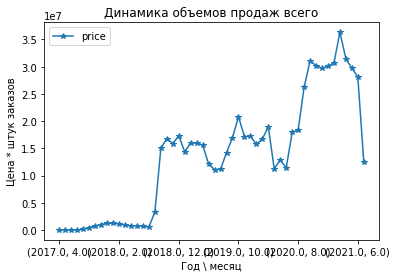

In [37]:
# График типовыми средствами matplotlib

ax = df1.plot(style = '*-')
ax.set_title('Динамика объемов продаж всего')
ax.set_xlabel('Год \ месяц');
ax.set_ylabel('Цена * штук заказов');


#### ТОП 15 по объемам продаж по аптеке

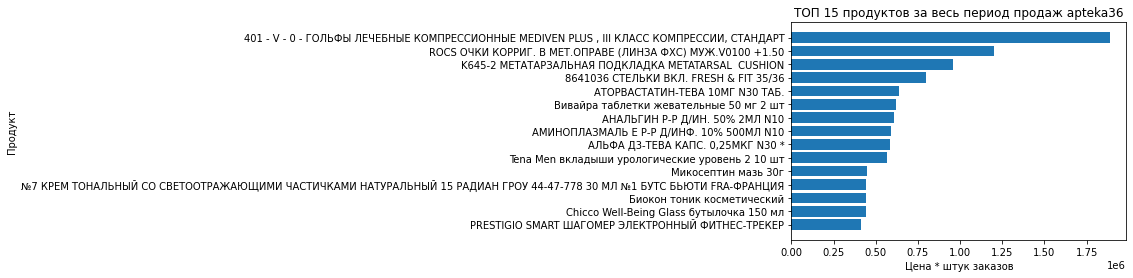

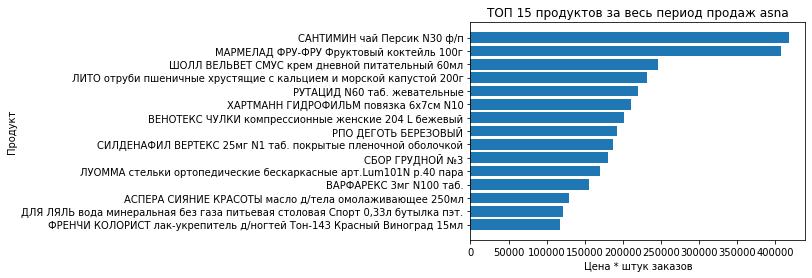

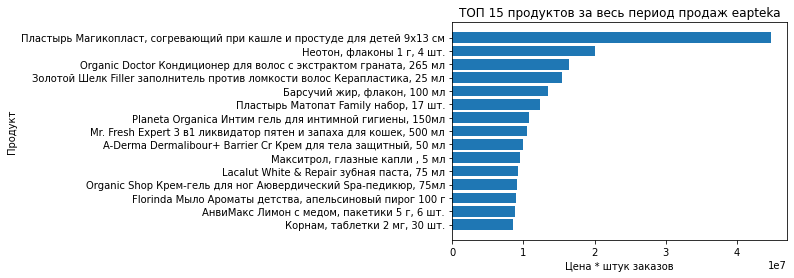

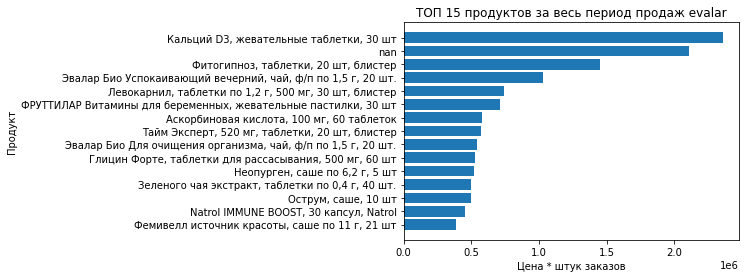

In [38]:
# Сгруппируем по product_id, осортируем по убыванию и оставим ТОП 25
for apteka, data in df_purchases_selected.groupby(df_purchases_selected.apteka_name):
    df2 = data.groupby([data.new_product_id], as_index = True)[[ 'price']].sum().sort_values(by = 'price', ascending = False).head(15)
    df2 = df2.sort_values(by = 'price', ascending = True)
    df2 = df2.merge(df_procuct_infos_selected[['new_product_id','name']], on = 'new_product_id', how = 'left')
    fig, ax = plt.subplots()    
    ax.barh(df2.index, df2.price)

    ax.set_title('TOП 15 продуктов за весь период продаж '+ apteka)
    ax.set_ylabel('Продукт');
    ax.set_xlabel('Цена * штук заказов');

    #  Устанавливаем позиции тиков:
    ax.set_yticks(df2.index)

    #  Устанавливаем подписи тиков
    ax.set_yticklabels(df2.name)
    plt.show()


## Обработаем сравнение по периодам

In [39]:
df_purchases_selected.sort_index(inplace = True)

In [40]:
df_purchases_selected.head()

,customer_id,product_id,order_id,area_id,apteka_name,prefix,new_product_id,new_category_id,price,year,month,day
datetime,,,,,,,,,,,,
2017-04-04 16:12:14,182252,1630,121821,NaN,asna,4000000,4001630,4002983,444.0,2017.0,4.0,4.0
2017-04-04 16:12:14,182252,1630,121821,NaN,asna,4000000,4001630,4002983,444.0,2017.0,4.0,4.0
2017-04-12 09:12:22,192762,6883,125453,NaN,asna,4000000,4006883,4002983,1399.0,2017.0,4.0,12.0
2017-04-13 09:14:00,182716,10926,97255,NaN,asna,4000000,4010926,4002983,387.0,2017.0,4.0,13.0
2017-04-13 09:14:06,486632,3487,126708,NaN,asna,4000000,4003487,4002983,227.0,2017.0,4.0,13.0


In [42]:
df1 = df_purchases_selected['2020-07-01':'2020-12-31'][['apteka_name', 'new_product_id', 'price']]
df1 = df1.groupby(['apteka_name', 'new_product_id']).sum()
df1 = df1.rename({'price':'2020_2'}, axis = 1)
df1

C:\Users\popts\AppData\Local\Temp/ipykernel_2076/2177979534.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df1 = df_purchases_selected['2020-07-01':'2020-12-31'][['apteka_name', 'new_product_id', 'price']]


2020_2
apteka_name new_product_id         
apteka36    3012575         93568.0
            3018663          2256.0
            3018937         12024.0
            3019765         74736.0
            3020139          9440.0
...                             ...
evalar      6066616          2575.0
            6066617         33912.0
            6066618         75810.0
            6067515          6282.0
            6067751          3832.0

[649 rows x 1 columns]

In [43]:
df2 = df_purchases_selected['2021-01-01':'2021-06-30'][['apteka_name', 'new_product_id', 'price']]
df2 = df2.groupby(['apteka_name', 'new_product_id']).sum()
df2 = df2.rename({'price':'2021_1'}, axis = 1)
df2

C:\Users\popts\AppData\Local\Temp/ipykernel_2076/1628871526.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df2 = df_purchases_selected['2021-01-01':'2021-06-30'][['apteka_name', 'new_product_id', 'price']]


2021_1
apteka_name new_product_id         
apteka36    3012575         16512.0
            3019765          8304.0
            3019839          2720.0
            3023968          7928.0
            3024899         12600.0
...                             ...
evalar      6071014         19250.0
            6071015           789.0
            6071773          2245.0
            6072011          2260.0
            6072787          3213.0

[824 rows x 1 columns]

In [44]:
# сольем 2 полугодия в одну таблицу
df3 = df2.merge(df1, left_index=True, right_index=True, how = 'left')

In [45]:
# Отсутсвие продаж заполным малым занчением, чтобы не было деления на 0. 
df3.fillna(0.1, inplace = True)

# Вернемся к простому индексу, аптека и продукт перейдут в колонки
df3.reset_index(inplace = True)

In [46]:
# Прирост %
df3['k'] = ((df3['2021_1'] - df3['2020_2']) / df3['2020_2'] * 100).round(1)

# Суммовое изменение
df3['delta'] = df3['2021_1'] - df3['2020_2']

In [47]:
df3.sort_values(by = 'k', ascending = False).head()

,apteka_name,new_product_id,2021_1,2020_2,k,delta
471,eapteka,5225770,359040.0,0.1,359039900.0,359039.9
483,eapteka,5227275,125421.0,0.1,125420900.0,125420.9
442,eapteka,5225317,120080.0,0.1,120079900.0,120079.9
816,evalar,6070942,100740.0,0.1,100739900.0,100739.9
411,eapteka,5161272,90132.0,0.1,90131900.0,90131.9


#### ТОП 15 по проценту прироста 2021_1 к 2020_2

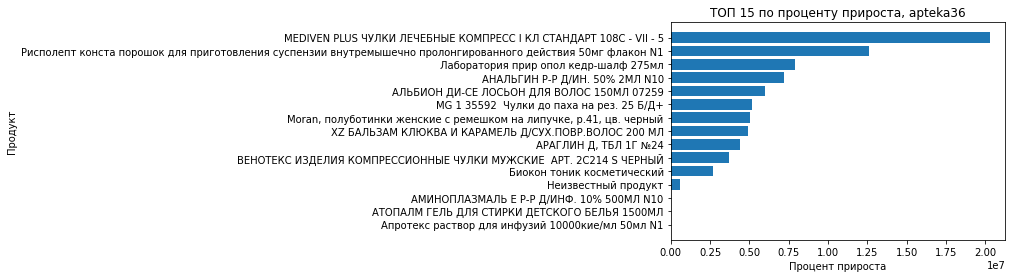

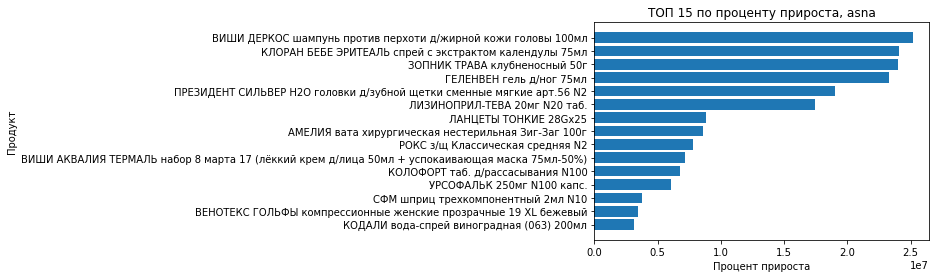

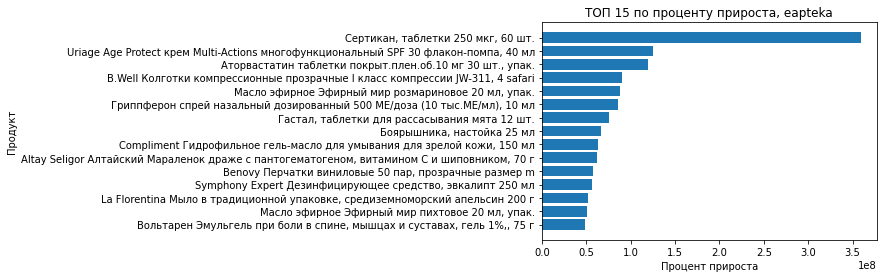

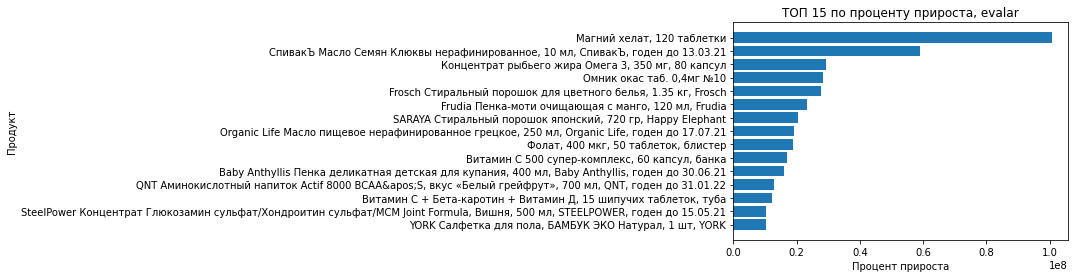

In [48]:
# Сгруппируем по product_id, осортируем по убыванию и оставим ТОП 25
for apteka, data in df3.groupby(df3.apteka_name):
    df2 = data.groupby([data.new_product_id], as_index = True)[['k']].sum().sort_values(by = 'k', ascending = False).head(15)
    df2 = df2.sort_values(by = 'k', ascending = True)
    # Подгрузим названия 
    df2 = df2.merge(df_procuct_infos_selected[['new_product_id','name']], on = 'new_product_id', how = 'left')
    fig, ax = plt.subplots()    
    ax.barh(df2.index, df2.k)

    ax.set_title('TOП 15 по проценту прироста, '+ apteka)
    ax.set_ylabel('Продукт');
    ax.set_xlabel('Процент прироста');

    #  Устанавливаем позиции тиков:
    ax.set_yticks(df2.index)

    #  Устанавливаем подписи тиков
    ax.set_yticklabels(df2.name)
    plt.show()


#### ТОП 15 по суммовому приросту 2021_1 к 2020_2

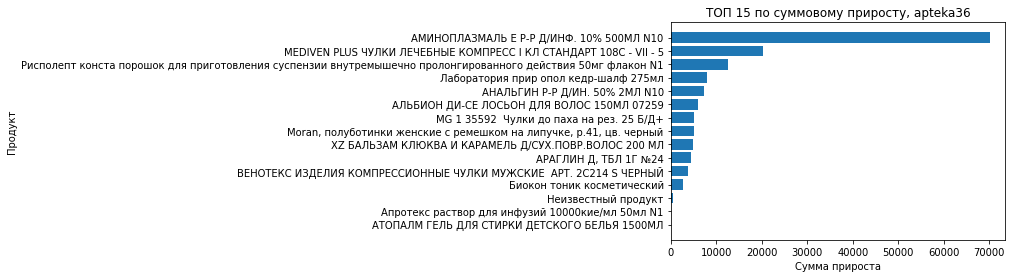

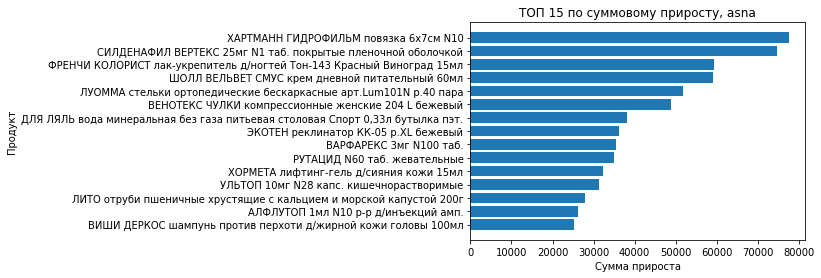

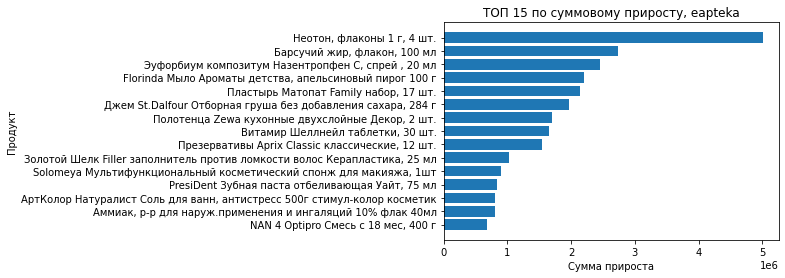

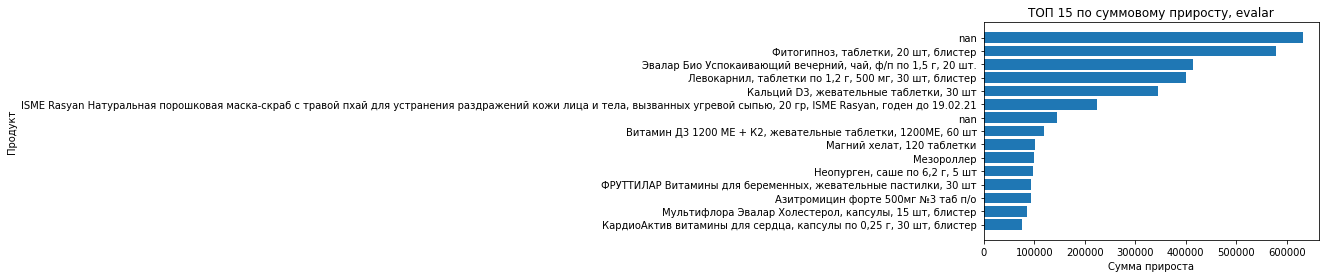

In [49]:
# Сгруппируем по product_id, осортируем по убыванию и оставим ТОП 25
for apteka, data in df3.groupby(df3.apteka_name):
    df2 = data.groupby([data.new_product_id], as_index = True)[['delta']].sum().sort_values(by = 'delta', ascending = False).head(15)
    df2 = df2.sort_values(by = 'delta', ascending = True)
    # Подгрузим названия 
    df2 = df2.merge(df_procuct_infos_selected[['new_product_id','name']], on = 'new_product_id', how = 'left')
    fig, ax = plt.subplots()    
    ax.barh(df2.index, df2.delta)

    ax.set_title('TOП 15 по суммовому приросту, '+ apteka)
    ax.set_ylabel('Продукт');
    ax.set_xlabel('Сумма прироста');

    #  Устанавливаем позиции тиков:
    ax.set_yticks(df2.index)

    #  Устанавливаем подписи тиков
    ax.set_yticklabels(df2.name)
    plt.show()
